<a href="https://colab.research.google.com/github/be-ahmadsam/CV-Line-Detection-/blob/main/CV4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CV project**

*Convert the image to grayscale then implement vertical and horizontal line detection*




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

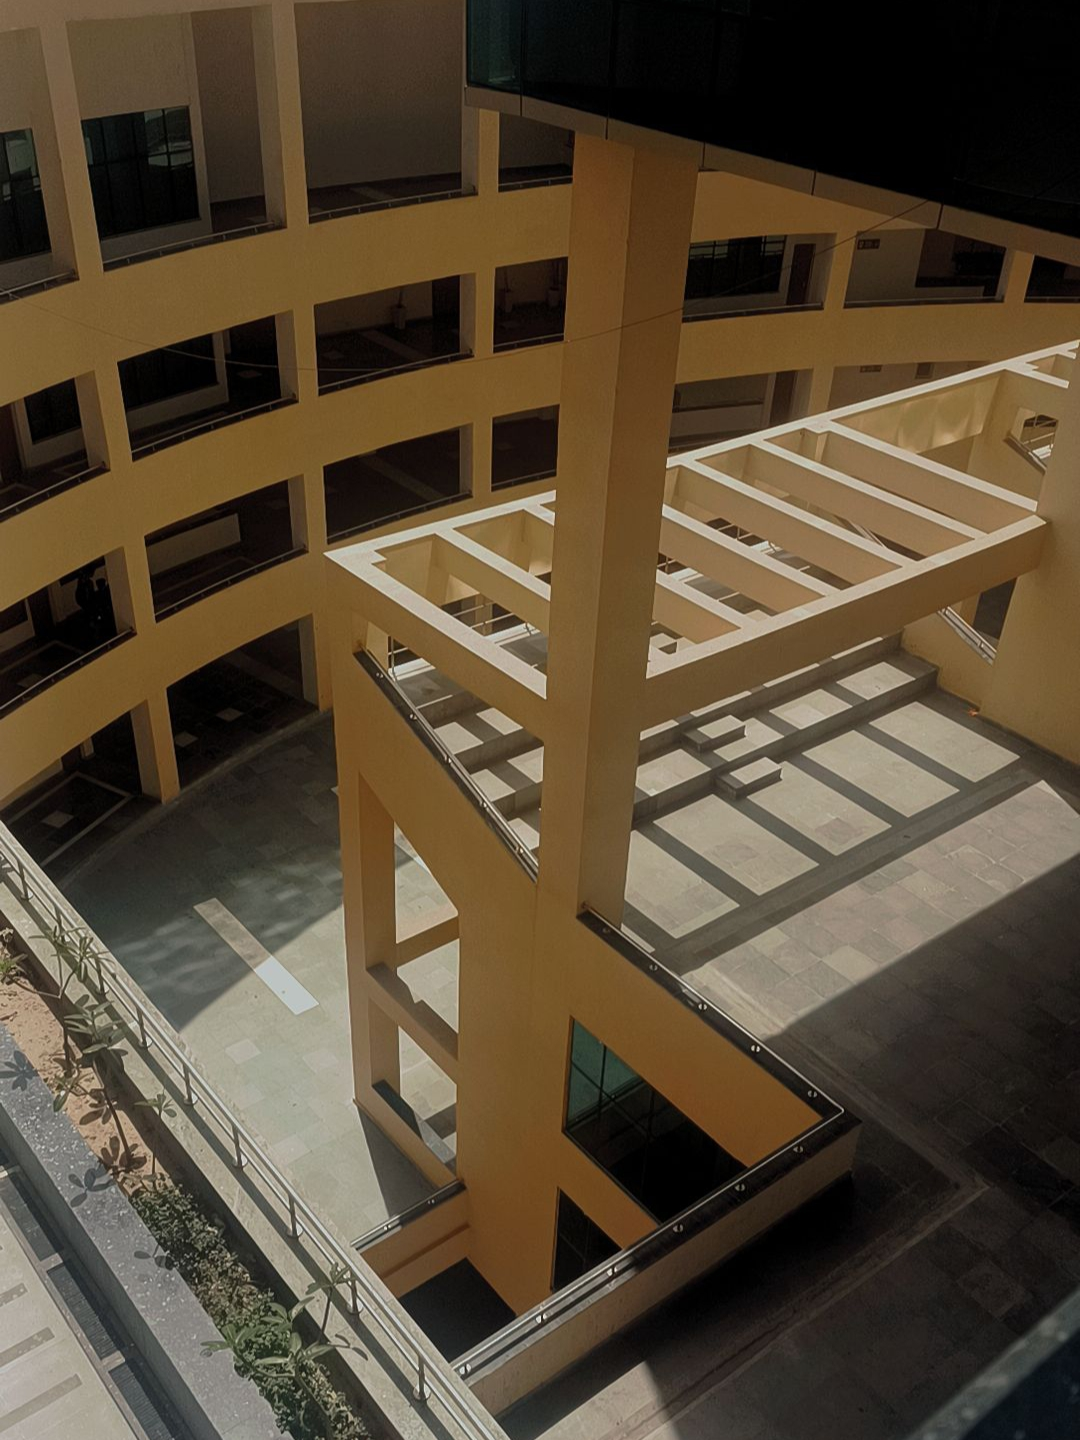

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Jama masjid image processing /college.jpg')

# Display the image
cv2_imshow(img)


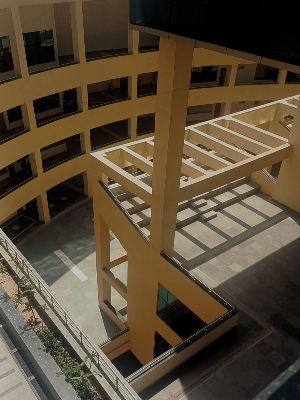

In [ ]:
image = cv2.resize(img, (300, 400))
cv2_imshow(image)

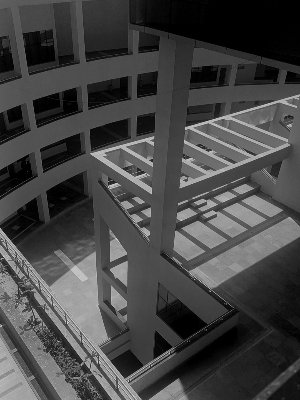

In [ ]:
def grayscale(image):

    height, width, channels = image.shape

    grayscale_image = numpy.zeros((height, width), dtype=numpy.uint8)

    # Convert each pixel to grayscale
    for y in range(height):
        for x in range(width):

            r, g, b = image[y, x]
            gray_value = int(0.2989 * r + 0.5870 * g + 0.1140 * b)
            grayscale_image[y, x] = gray_value
    return grayscale_image

Gimage = grayscale(image)

# Display the grayscale image
cv2_imshow(Gimage)


In [ ]:
def apply_blur(image, kernel_size):
    height, width = image.shape

    #kernel for blurring
    kernel = numpy.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)

    #empty array to store the blurred image
    blurred_image = numpy.zeros_like(image)
    # Apply the blur filter
    for y in range(height - kernel_size + 1):
        for x in range(width - kernel_size + 1):
            # Apply the kernel to the image patch
            patch = image[y:y+kernel_size, x:x+kernel_size]
            blurred_pixel = numpy.sum(patch * kernel)
            blurred_image[y, x] = blurred_pixel

    return blurred_image


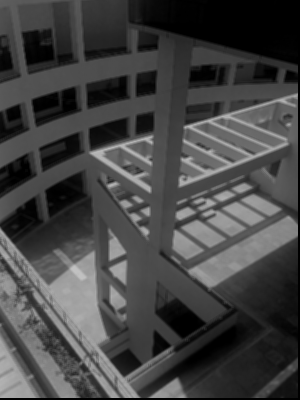

In [ ]:
Bimage = apply_blur(Gimage, kernel_size=3)
Bimage111= Bimage
cv2_imshow(Bimage)

In [ ]:
def hough_lines(image, rho_resolution=1, theta_resolution=numpy.pi/180.0, threshold=120):
    rows, cols = image.shape
    diagonal_length = int(numpy.sqrt(rows ** 2 + cols ** 2))
    theta_range = numpy.linspace(-numpy.pi/2, numpy.pi/2, int(numpy.pi/theta_resolution))
    accumulator = numpy.zeros((2 * diagonal_length, len(theta_range)), dtype=numpy.uint8)

    edge_pixels = numpy.argwhere(image > 0)
    for pixel in edge_pixels:
        x, y = pixel[0], pixel[1]
        for theta_idx, theta in enumerate(theta_range):
            rho = int(x * numpy.cos(theta) + y * numpy.sin(theta))
            accumulator[rho + diagonal_length, theta_idx] += 1

    lines = []
    for rho_idx in range(accumulator.shape[0]):
        for theta_idx in range(accumulator.shape[1]):
            if accumulator[rho_idx, theta_idx] > threshold:
                rho = rho_idx - diagonal_length
                theta = theta_range[theta_idx]
                lines.append((rho, theta))

    return lines

apply non max supression on simple image

In [ ]:
def line(image1):
  # Apply Canny edge detection
    canimg = cv2.Canny(image1, 50, 200)

    lines = hough_lines(canimg)

    # Draw detected lines on the original image
    if lines:
        for rho, theta in lines:
            a = numpy.cos(theta)
            b = numpy.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

        # Display the image with detected lines
        cv2_imshow(image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("No lines detected.")

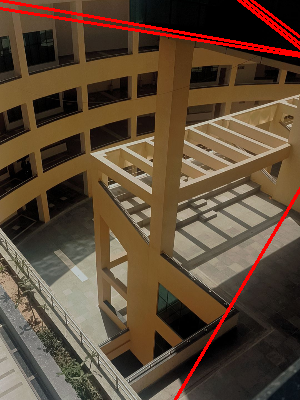

In [ ]:
line(Bimage)

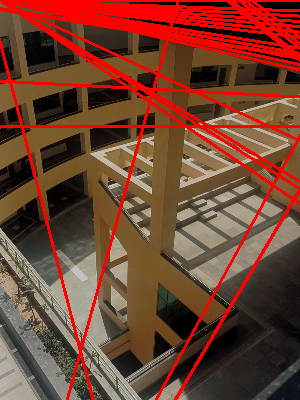

In [ ]:
line(Gimage)

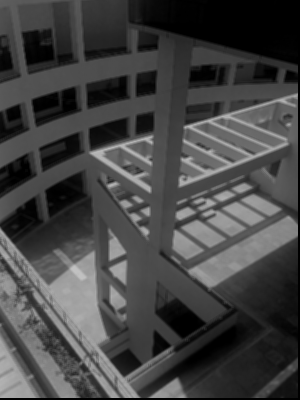

In [ ]:
cv2_imshow(Bimage111)

In [ ]:
from scipy import ndimage
def sobel_filters(img):
    # Sobel filter kernels
    Kx = numpy.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], numpy.float32)
    Ky = numpy.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], numpy.float32)

    # Apply Sobel filters to the image
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)

    # Compute gradient magnitude
    G = numpy.hypot(Ix, Iy)
    G = G / G.max() * 255

    return G


In [ ]:
def line1(image1):
  # Apply Canny edge detection
    edgeImage = sobel_filters(image1)

    lines = hough_lines(edgeImage)

    # Draw detected lines on the original image
    if lines:
        for rho, theta in lines:
            a = numpy.cos(theta)
            b = numpy.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

        # Display the image with detected lines
        cv2_imshow(image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("No lines detected.")

<ipython-input-54-87b0192a1c56>:8: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Ix = ndimage.filters.convolve(img, Kx)
<ipython-input-54-87b0192a1c56>:9: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Iy = ndimage.filters.convolve(img, Ky)


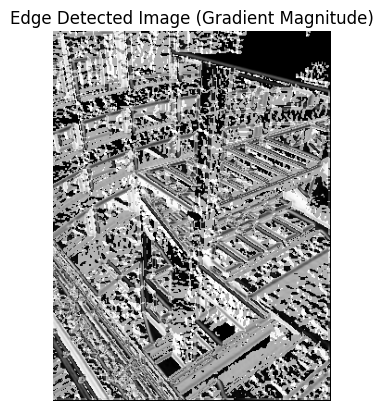

In [ ]:
gradient_magnitude = sobel_filters(Bimage111)

# Print the edge-detected image (gradient magnitude)
plt.imshow(gradient_magnitude, cmap='gray')
plt.axis('off')
plt.title('Edge Detected Image (Gradient Magnitude)')
plt.show()